# Deep Learning Image Classification System using CNN on CIFAR-10

CIFAR-10 contains 60,000 color images (32×32) across 10 classes:

Airplane

Automobile

Bird

Cat

Deer

Dog

Frog

Horse

Ship

Truck

So my model solves:

Given an image → predict which object it belongs to.

This is a multi-class image classification problem.

In [21]:
import tensorflow_datasets as tfds
print("TFDS installed successfully")

TFDS installed successfully


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Step 1 — Data Loading (tfds)

In [23]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

### Step 2 — Data Preprocessing

Why normalize?

Original pixel values: 0–255
After normalization: 0–1

In [24]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0   # Normalize
    return image, label

### Step 3 — Efficient Data Pipeline

In [25]:
ds_train = ds_train.map(preprocess)
ds_test = ds_test.map(preprocess)

ds_train = ds_train.shuffle(10000).batch(64).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(64).prefetch(tf.data.AUTOTUNE)

### Step 4 - Model Architecture

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

image_model = keras.Sequential([
    
    # Convolution Block 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # Convolution Block 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Convolution Block 3
    layers.Conv2D(128, (3,3), activation='relu'),
    
    # Flatten
    layers.Flatten(),
    
    # Fully Connected
    layers.Dense(128, activation='relu'),
    
    # Output Layer
    layers.Dense(10, activation='softmax')
])

### Step 5 - Compilation

In [27]:

image_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Step 6 - Training

In [28]:
history = image_model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.4402 - loss: 1.5345 - val_accuracy: 0.5487 - val_loss: 1.2537
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.5906 - loss: 1.1579 - val_accuracy: 0.6274 - val_loss: 1.0675
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6515 - loss: 1.0006 - val_accuracy: 0.6522 - val_loss: 0.9987
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6880 - loss: 0.8869 - val_accuracy: 0.6834 - val_loss: 0.9151
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7244 - loss: 0.7940 - val_accuracy: 0.6946 - val_loss: 0.8736
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7480 - loss: 0.7232 - val_accuracy: 0.7093 - val_loss: 0.8410
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7699 - loss: 0.6586 - val_accuracy: 0.7165 - val_loss: 0.8416
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7921 - loss: 0.5983 - 

### Step 7 - Evaluation

In [32]:

loss, accuracy = image_model.evaluate(ds_test)
print("Test Accuracy:", accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7174 - loss: 0.8669
Test Accuracy: 0.7174000144004822


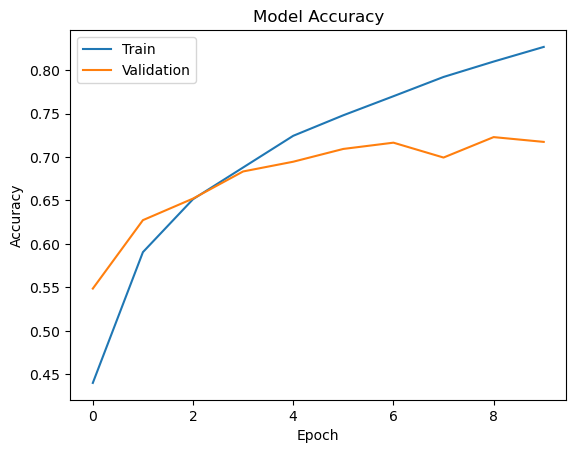

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

### Keep raw dataset for visualization


Reload Dataset Fresh (Clean Version)

In [34]:
(ds_train_raw, ds_test_raw), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

Visualize From Raw Dataset

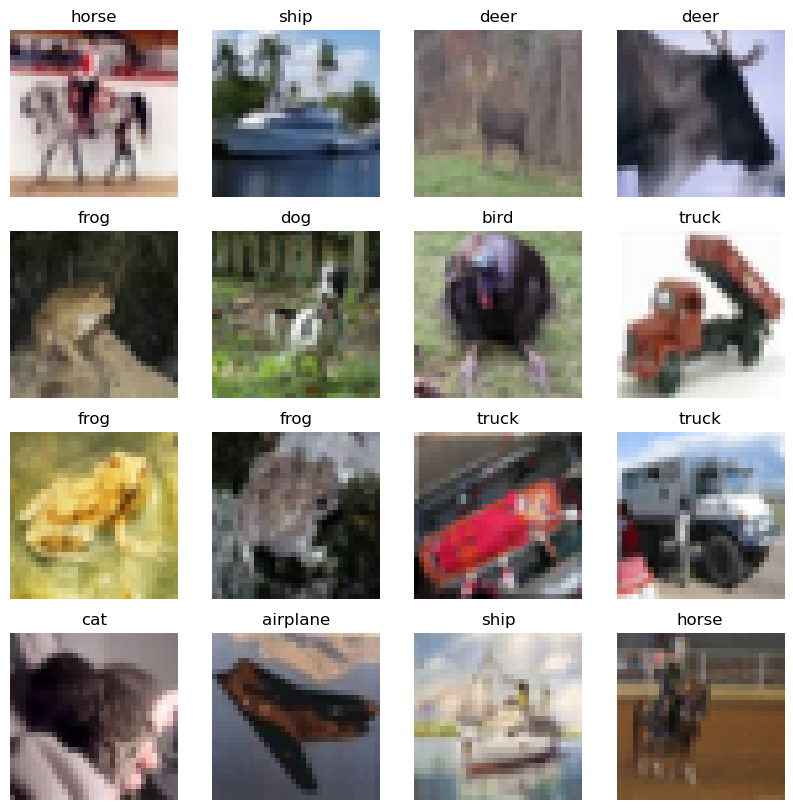

In [35]:
import matplotlib.pyplot as plt

class_names = ds_info.features['label'].names

plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(ds_train_raw.take(16)):
    plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis("off")

plt.show()